In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from matplotlib.ticker import PercentFormatter
import math

In [4]:
pd.set_option('display.max_columns', None)
df = pd.read_excel("D:\Machine learning\coding\premimums_rest.xlsx")
print(df.shape)
df.head(5)

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Shiwan\AppData\Local\Temp\ipykernel_9352\1740251981.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_excel("D:\Machine learning\coding\premimums_rest.xlsx")


(29904, 13)


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [5]:

df['Genetical_Risk'] =0


In [6]:
df.columns=df.columns.str.replace(' ','_').str.lower()
df.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0


In [7]:
print(df.isna().sum())

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64


In [8]:
df.dropna(inplace=True)
print(df.isna().sum())

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64


In [9]:
print(df.duplicated().sum())  #### it will give total number of duplicated rows
df.drop_duplicates(inplace=True)  ### if duplicated rows are present use this to drop them
df.duplicated().sum()

0


0

In [10]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


In [11]:
print(df[df.number_of_dependants<0].shape)

(50, 14)


In [12]:
print(df[df.number_of_dependants<0].number_of_dependants.unique())

[-1 -3]


In [13]:

df.number_of_dependants = abs(df.number_of_dependants)
print(df.number_of_dependants.describe())

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64


In [14]:
numeric_columns =df.select_dtypes(['Float64','int64']).columns
print(numeric_columns)

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')


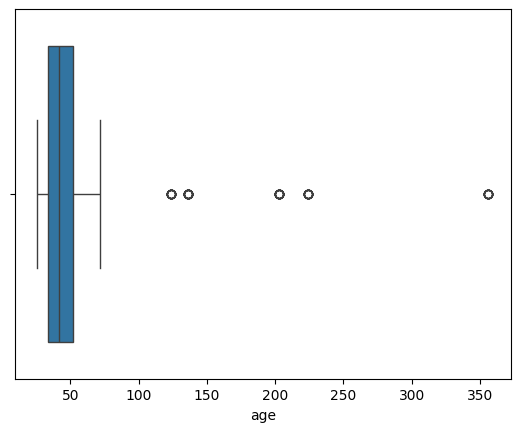

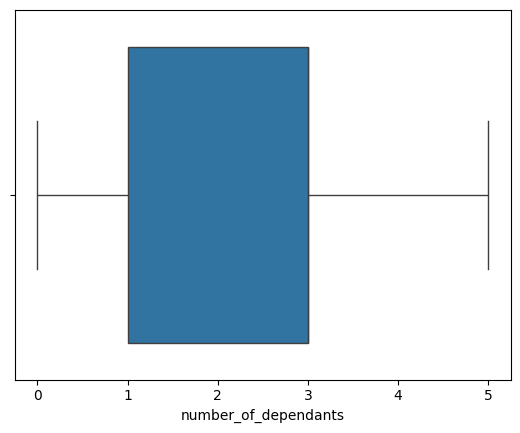

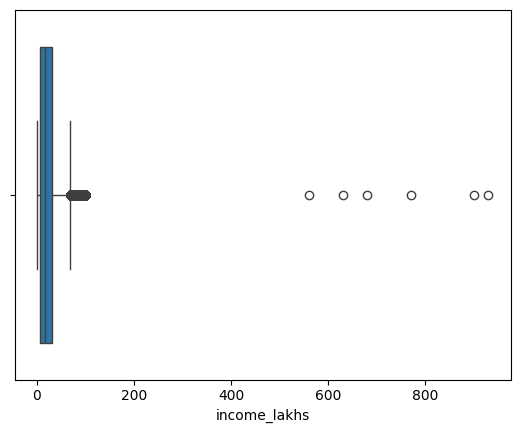

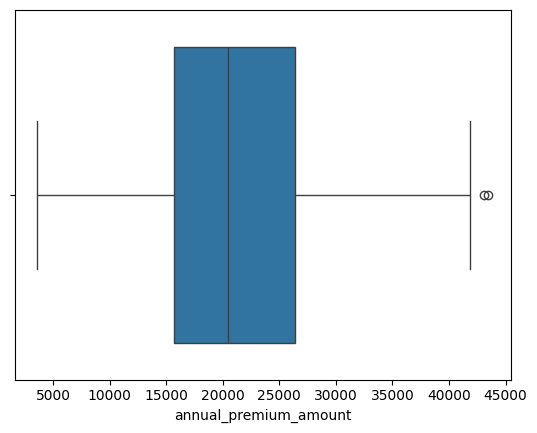

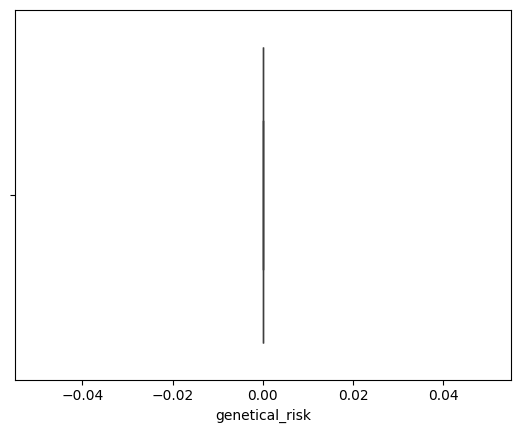

In [15]:
for col in numeric_columns:   ### boxplot is use to detect outliers
   sns.boxplot(x=df[col])
   plt.show()

In [16]:
print(df[df.age>100].age.unique())


[224 124 136 203 356]


In [17]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29828.000000,29828.000000,29828.000000,29828.000000,29828.0
mean,43.095380,2.387790,23.371530,20901.900563,0.0
std,11.041991,1.420641,24.751262,6928.457636,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15706.000000,0.0
50%,42.000000,3.000000,17.000000,20496.000000,0.0
75%,52.000000,3.000000,32.000000,26361.000000,0.0
max,72.000000,5.000000,930.000000,43471.000000,0.0


In [18]:
df1.income_lakhs.quantile([0.25,0.75])

0.25     7.0
0.75    32.0
Name: income_lakhs, dtype: float64

In [19]:
def get_iqr_bounds(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 -1.5 *IQR
    upper_bound = Q1 +1.5 *IQR
    return lower_bound,upper_bound


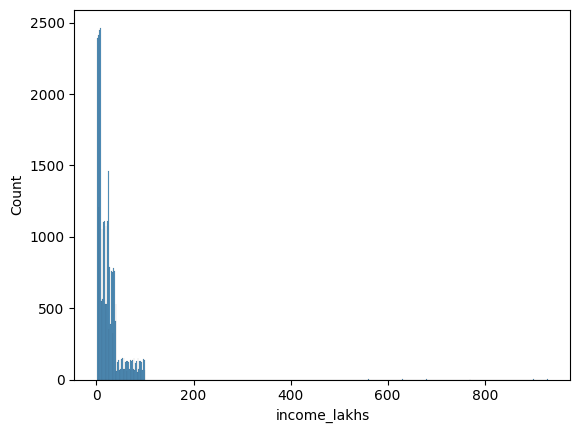

In [20]:
sns.histplot(df1.income_lakhs)
plt.show()

In [21]:
quantile_threshold = df.income_lakhs.quantile(0.999)
print(quantile_threshold)

100.0


In [22]:
print(df1[df1. income_lakhs> quantile_threshold].shape)

(6, 14)


In [23]:
df2 = df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()


,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.0
mean,43.094896,2.387734,23.226343,20900.689223,0.0
std,11.042430,1.420644,22.455408,6928.192115,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15705.250000,0.0
50%,42.000000,3.000000,17.000000,20495.500000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,72.000000,5.000000,100.000000,43471.000000,0.0


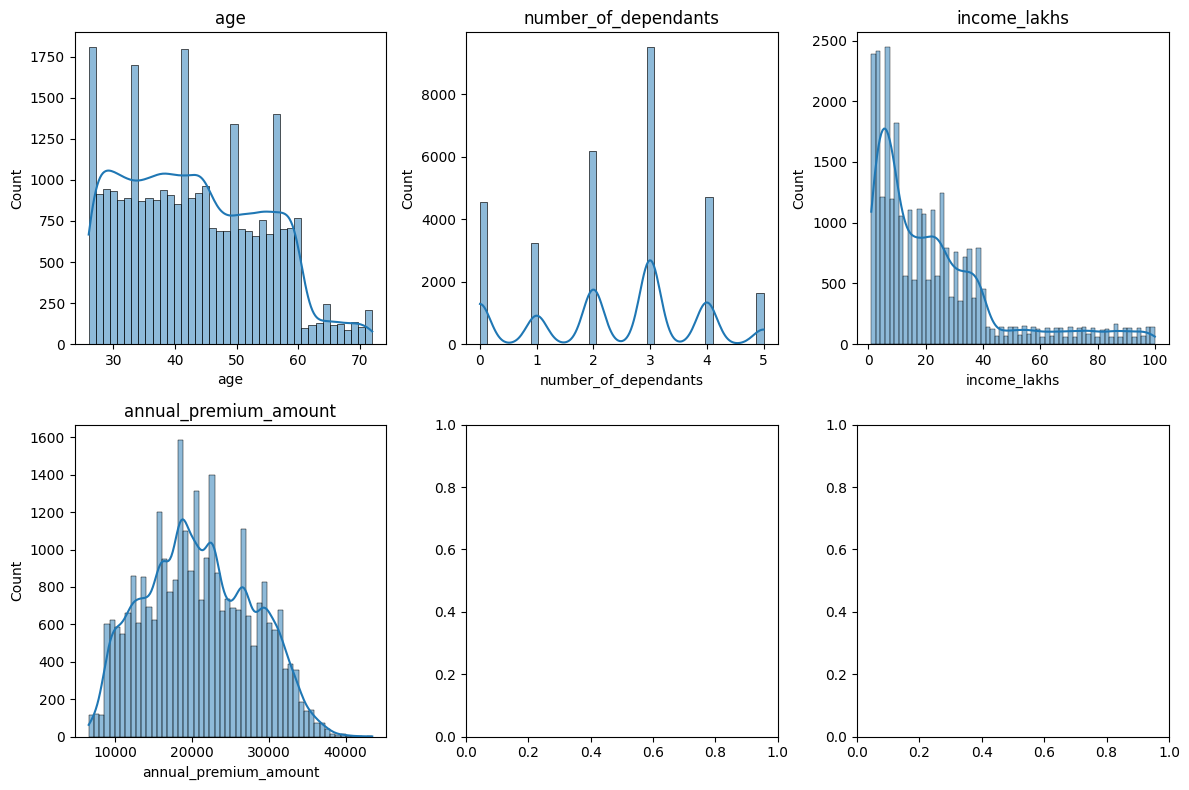

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))  # 2 rows, 2 columns

for i, column in enumerate(numeric_columns[:4]):  # limit to 4 visuals if needed
    ax = axs[i // 3, i % 3]
    sns.histplot(df2[column], kde=True, ax=ax)
    ax.set_title(column)

if len(numeric_columns)%3 ==0:
    for j in range (len(numeric_columns),6):
        axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()


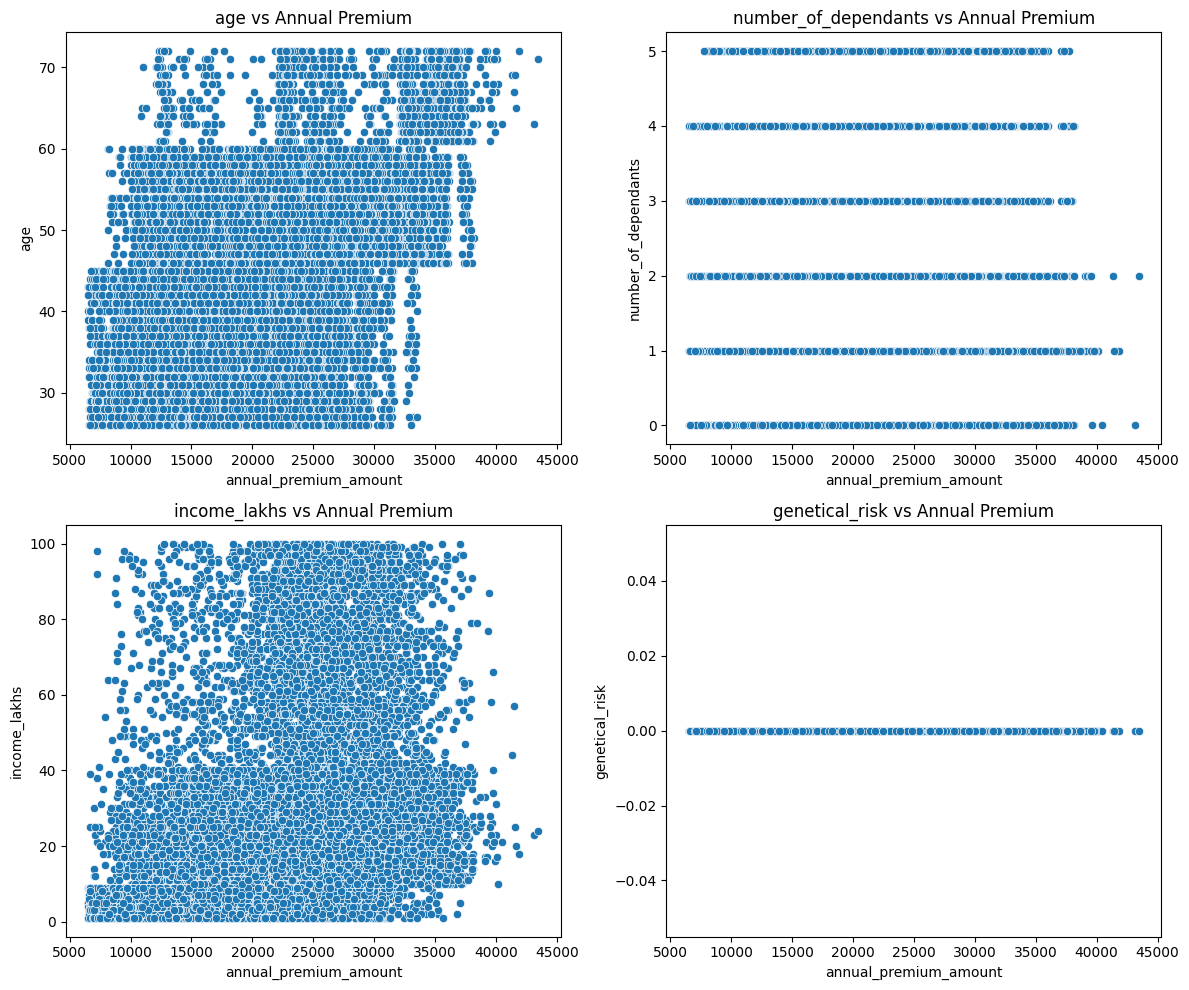

In [25]:
from itertools import combinations

y_columns = [col for col in numeric_columns if col != 'annual_premium_amount'][:4]  # First 4

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(y_columns):
    sns.scatterplot(data=df2, x='annual_premium_amount', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs Annual Premium')

plt.tight_layout()
plt.show()

In [26]:
print(df2.columns)

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')


In [27]:
categorical_cols = [ 'gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level','medical_history', 'insurance_plan']
for col in categorical_cols:
    print(col,":",df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [28]:
df2["smoking_status"].replace({
    'Smoking=0': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Not Smoking': 'No Smoking'
},inplace=True)

print(df2.smoking_status.unique())

['No Smoking' 'Regular' 'Occasional']


C:\Users\Shiwan\AppData\Local\Temp\ipykernel_9352\3592867404.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["smoking_status"].replace({


In [29]:
pct_count =df2.gender.value_counts(normalize=True)
print(pct_count)

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64


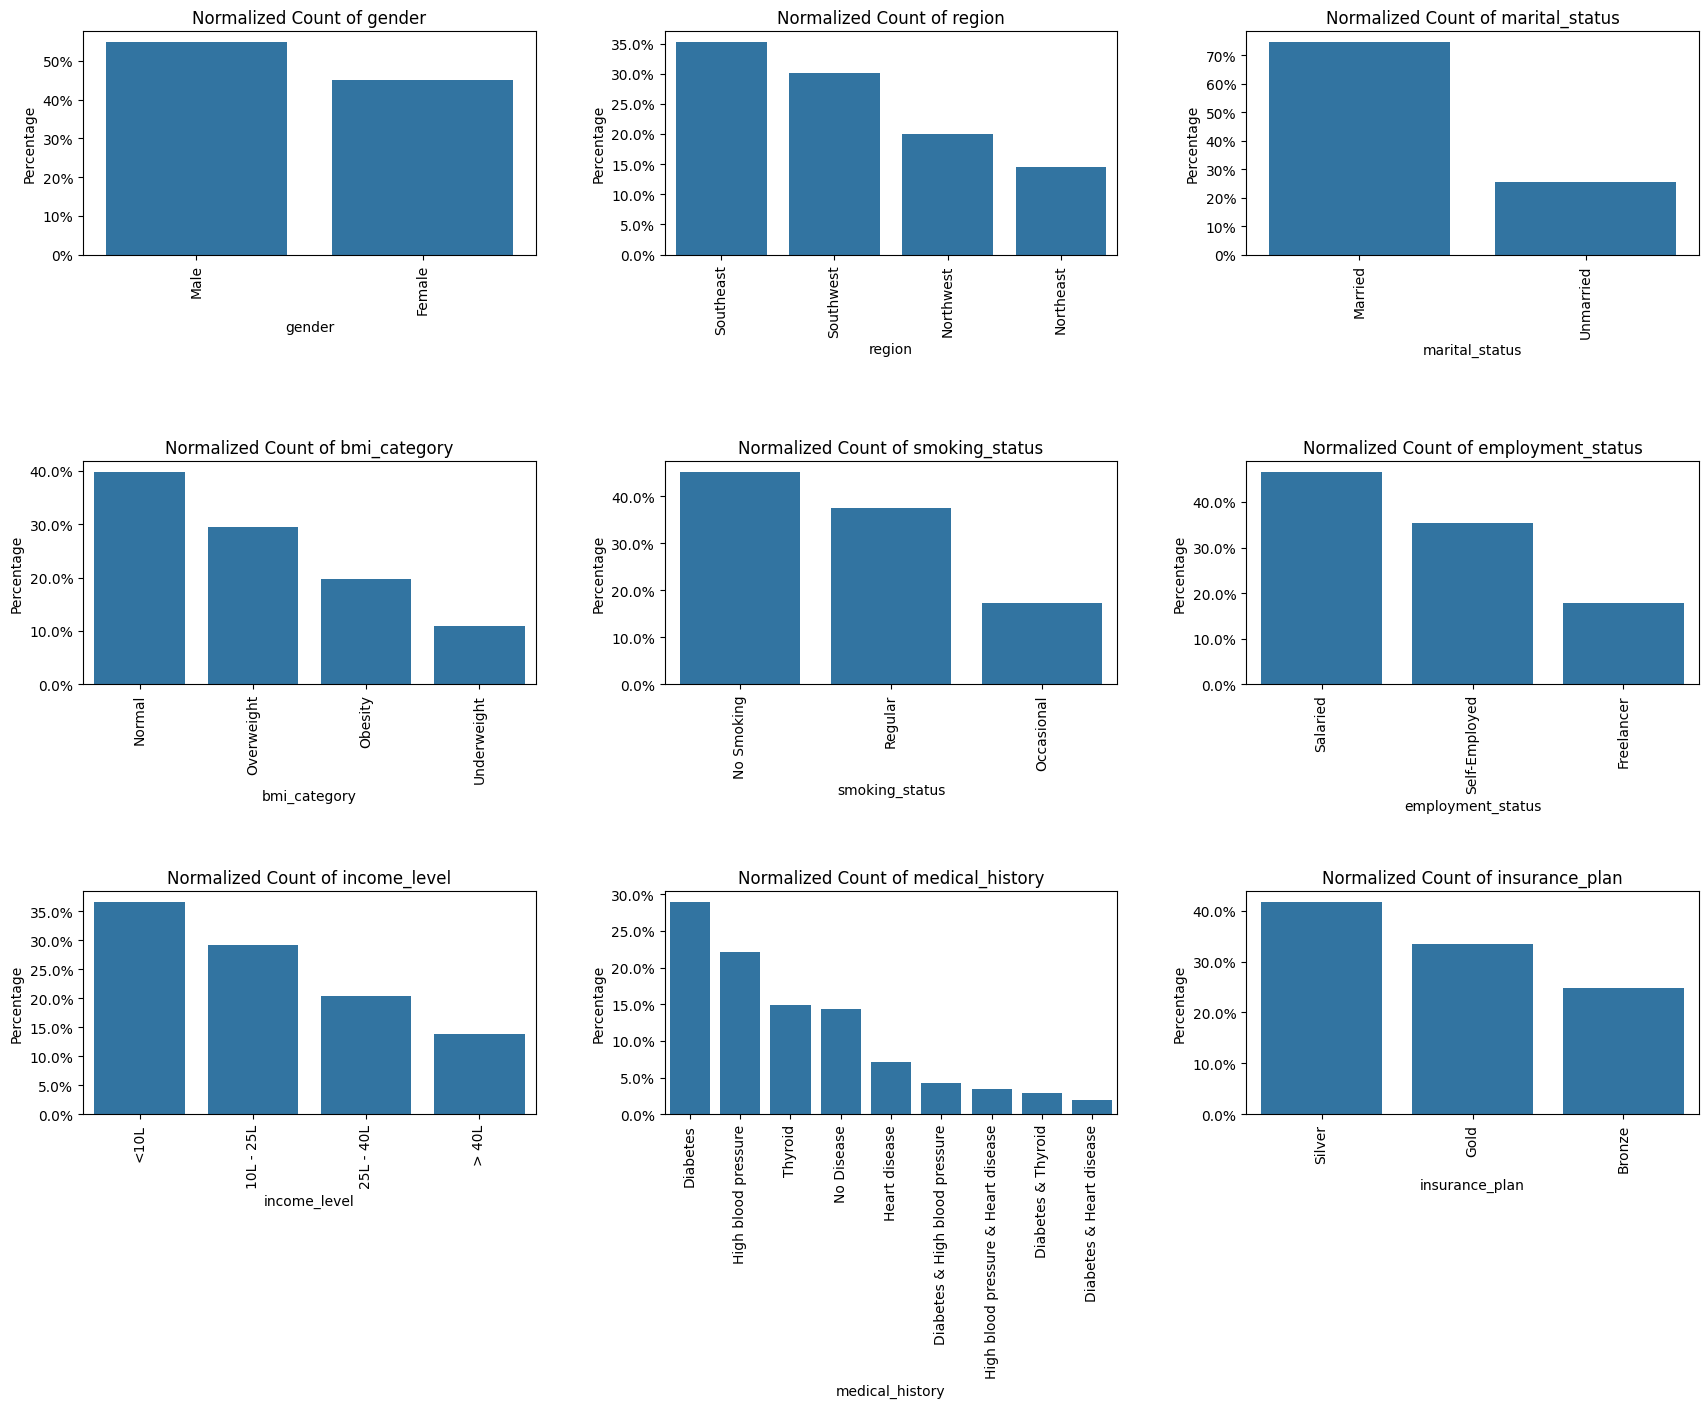

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Number of plots needed
n_cols = len(categorical_cols)

# Set up a 3x3 grid of subplots
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 15))  # Adjust size as needed
axes = axes.flatten()  # Flatten to make 1D indexing easier

# Plot each column
for i, col in enumerate(categorical_cols):
    normalized_counts = df2[col].value_counts(normalize=True).reset_index()
    normalized_counts.columns = [col, 'percentage']
    
    sns.barplot(data=normalized_counts, x=col, y='percentage', ax=axes[i])
    axes[i].set_title(f'Normalized Count of {col}')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylabel('Percentage')
    axes[i].yaxis.set_major_formatter(PercentFormatter(1.0))

# Turn off any unused subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])  # Remove empty axes

plt.tight_layout(pad=4.0)
plt.show()



insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          799  3554    4354
25L - 40L          301  2631    3142
<10L              6054   527    4341
> 40L              214  3287     618


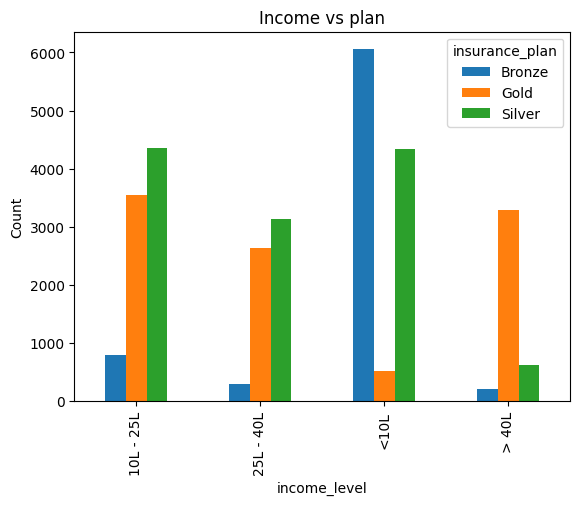

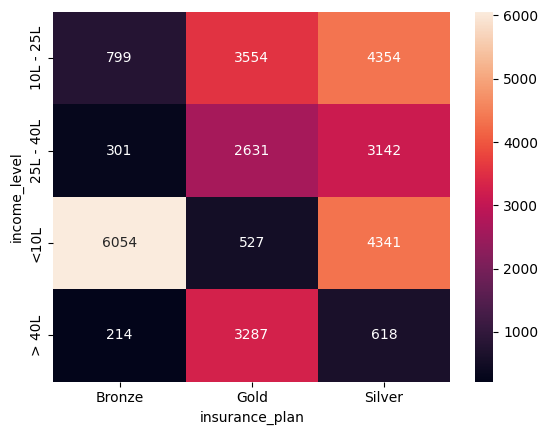

In [31]:
crosstab=pd.crosstab(df2.income_level,df2.insurance_plan )
print(crosstab)

crosstab.plot(kind="bar")
plt.title("Income vs plan")
plt.ylabel("Count")
plt.show()

sns.heatmap(crosstab,annot=True,fmt="d")
plt.show()

In [32]:
risk_scores = {
    'diabetes': 6,
    'heart disease': 8,
    'high blood pressure': 6,
    'thyroid': 5,
    'no disease': 0,
    'none': 0
}

# Split medical_history into two disease columns
df2[["diseases1", "diseases2"]] = (
    df2['medical_history']
    .str.lower()
    .str.split("&", expand=True)
    .apply(lambda x: x.str.strip())
)

# Fill missing values with 'none'
df2['diseases1'].fillna('none', inplace=True)
df2['diseases2'].fillna('none', inplace=True)

# CALCULATING TOTAL_RISK_SCORE
df2['total_risk_score'] = 0
for disease_col in ['diseases1', 'diseases2']:
    df2['total_risk_score'] += df2[disease_col].map(risk_scores)

    

C:\Users\Shiwan\AppData\Local\Temp\ipykernel_9352\3672568611.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['diseases1'].fillna('none', inplace=True)
C:\Users\Shiwan\AppData\Local\Temp\ipykernel_9352\3672568611.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [33]:
# Output min and max
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
print("Max score:", max_score)
print("Min score:", min_score)

Max score: 14
Min score: 0


In [34]:
#### NORMALIZED RISK SCORE
df2['normalized_risk_score'] = (df2["total_risk_score"] - min_score) / (max_score-min_score)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,diseases1,diseases2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,none,6,0.428571


In [35]:
#### LABLE ENCODING OF INSURANCE_PLAN
print(df2.insurance_plan.unique())
print("\n")
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold':3})
print(df2.insurance_plan.unique())

['Bronze' 'Silver' 'Gold']


[1 2 3]


In [36]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,diseases1,diseases2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,1,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,1,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,2,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,3,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,1,15610,0,diabetes,none,6,0.428571


In [37]:
##### LABLE ENCODING OF INCOME_LEVEL
print('\n')
print(df2.income_level.unique())
df2['income_level'] = df2['income_level'].map({'<10L':1 , '10L - 25L':2 , '25L - 40L':3,'> 40L':4 })
print(df2.income_level.unique())
df2.head()



['<10L' '10L - 25L' '> 40L' '25L - 40L']
[1 2 4 3]


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,diseases1,diseases2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,4,77,No Disease,3,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,2,14,Diabetes,1,15610,0,diabetes,none,6,0.428571


In [38]:
##### ONE HOT ENCODING
print('\n')
print('\n')
nominal_cols = ['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3 =pd.get_dummies(df2,columns=nominal_cols,drop_first=True,dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,diseases1,diseases2,total_risk_score,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,0,diabetes,none,6,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,0,diabetes,none,6,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,0,high blood pressure,none,6,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,0,no disease,none,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,Diabetes,1,15610,0,diabetes,none,6,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [39]:
#### DROPPING UNUSEFULL COLUMNS

df4 = df3.drop(['medical_history','diseases1', 'diseases2','total_risk_score' ],axis= 1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


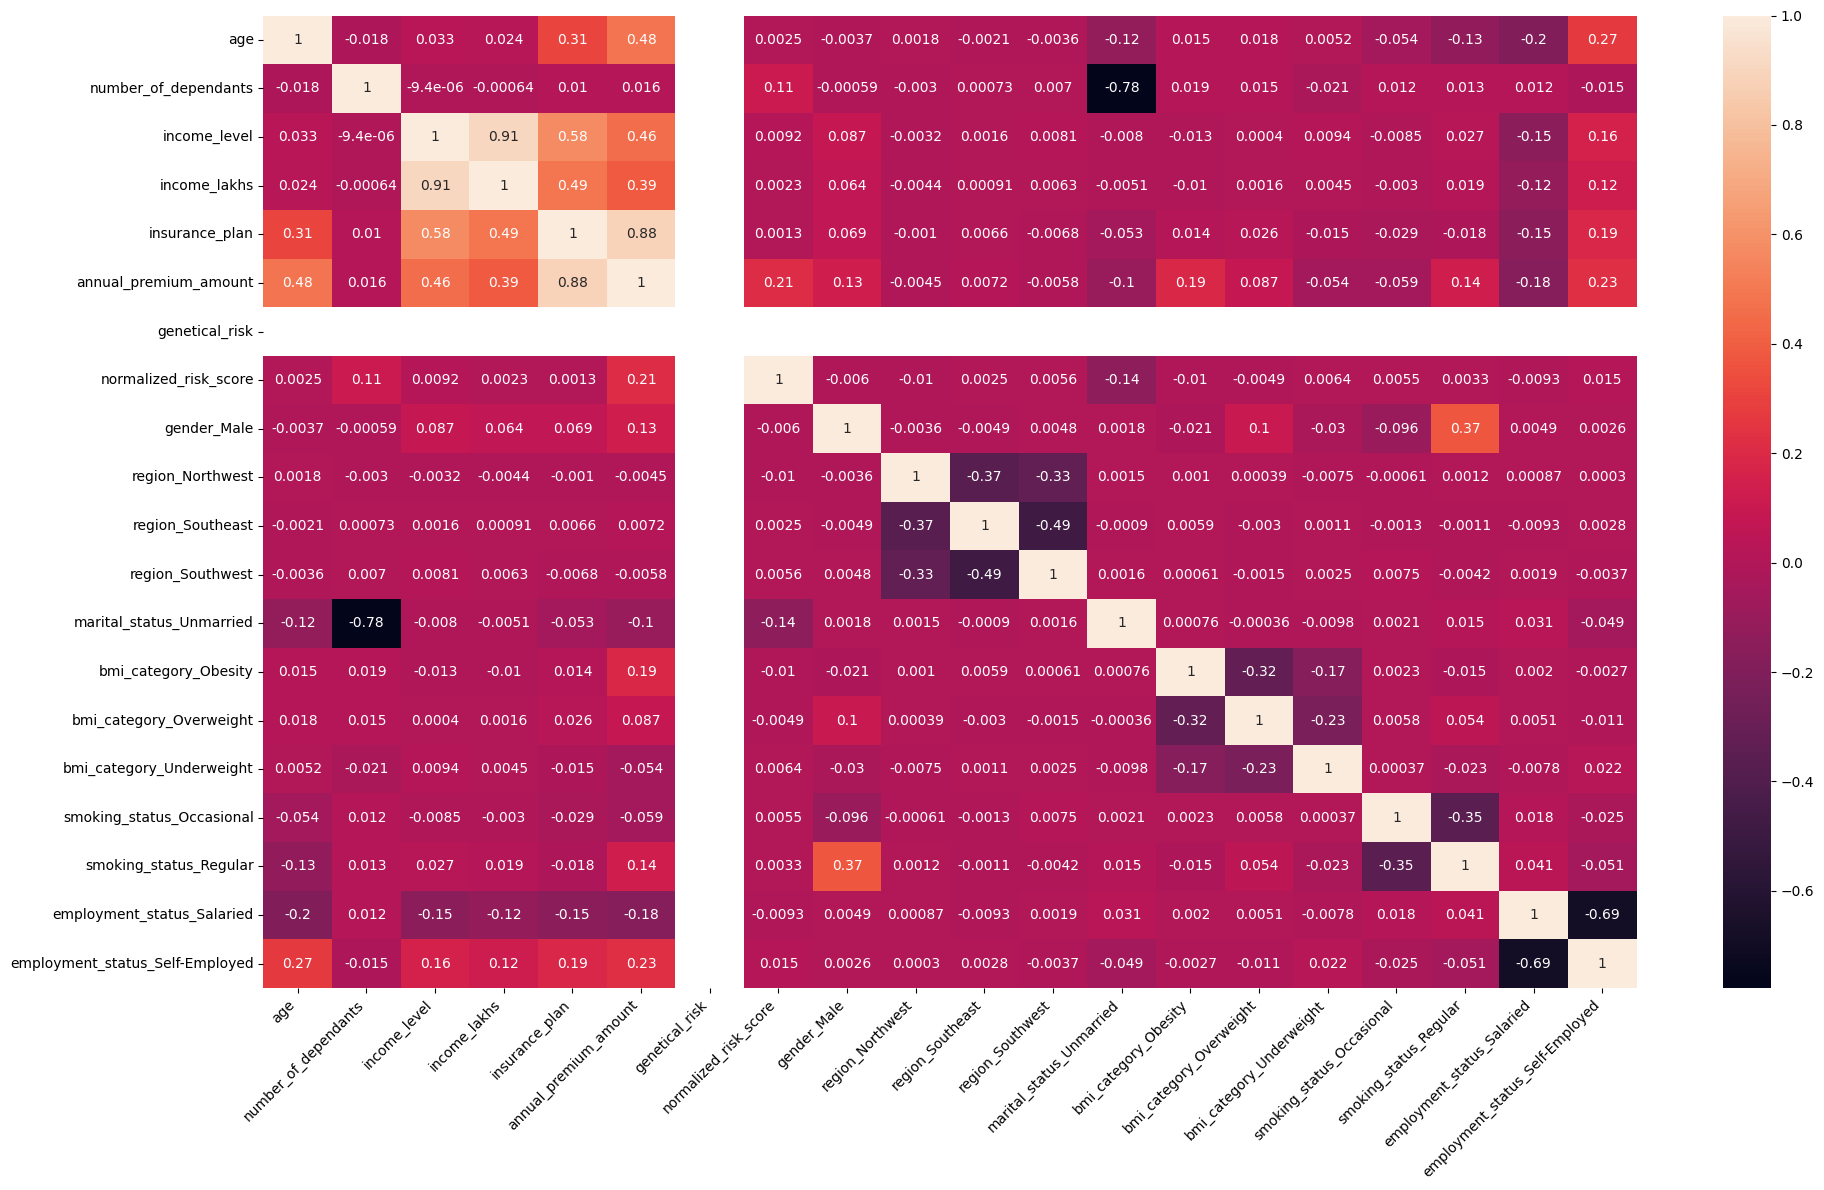

In [40]:
#### HEAT MAP OF DATAFRAME
cm = df4.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha = 'right')
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

In [41]:
###### SCALING DATA BY MINMAXSCALER
X = df4.drop("annual_premium_amount",axis='columns')
Y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
col_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan','genetical_risk']
scaler = MinMaxScaler()
X[col_to_scale] = scaler.fit_transform(X[col_to_scale])
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.000000,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.000000,0.050505,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.333333,0.191919,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,1.000000,0.767677,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.333333,0.131313,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [42]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.0,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.0,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
#### CALCULATING VIF
print('\n')
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Variable'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [44]:
print(calculate_vif(X))

c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                           Variable        VIF
0                               age   3.921783
1              number_of_dependants   6.278938
2                      income_level  13.890522
3                      income_lakhs  11.185596
4                    insurance_plan   5.271297
5                    genetical_risk        NaN
6             normalized_risk_score   3.810619
7                       gender_Male   2.599098
8                  region_Northwest   2.123965
9                  region_Southeast   2.980842
10                 region_Southwest   2.710097
11         marital_status_Unmarried   2.346288
12             bmi_category_Obesity   1.478248
13          bmi_category_Overweight   1.735085
14         bmi_category_Underweight   1.255611
15        smoking_status_Occasional   1.378264
16           smoking_status_Regular   2.131638
17       employment_status_Salaried   3.177473
18  employment_status_Self-Employed   2.871687


In [45]:
print(calculate_vif(X.drop('income_level',axis= "columns")))

c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                           Variable       VIF
0                               age  3.863055
1              number_of_dependants  6.278147
2                      income_lakhs  2.678102
3                    insurance_plan  4.574625
4                    genetical_risk       NaN
5             normalized_risk_score  3.808345
6                       gender_Male  2.591439
7                  region_Northwest  2.123277
8                  region_Southeast  2.979899
9                  region_Southwest  2.708641
10         marital_status_Unmarried  2.345757
11             bmi_category_Obesity  1.477906
12          bmi_category_Overweight  1.734646
13         bmi_category_Underweight  1.255270
14        smoking_status_Occasional  1.378237
15           smoking_status_Regular  2.131406
16       employment_status_Salaried  3.169218
17  employment_status_Self-Employed  2.866611


In [46]:
X_reduced = X.drop("income_level",axis='columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.050505,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.191919,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.767677,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.131313,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [47]:
#### MODEL TRAINING
print('\n')
X_train,X_test,y_train,y_test = train_test_split(X_reduced,Y,test_size=0.3,random_state=10)

model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
test_score = model_lr.score(X_test,y_test) ## 92.80%
print(test_score)
train_score = model_lr.score(X_train,y_train)
print(train_score)
print('\n')
print(model_lr.coef_)
print(model_lr.intercept_)



0.9538448451629948
0.9534163989489616


[ 7016.23932829 -1311.76470171  -708.19336921 14835.98820801
     0.          6053.6241234     37.55826883   -55.25087215
   -19.62254288   -22.28967559  -700.32019985  3926.8127061
  1979.45604663   612.86623617   837.3951011   2800.66184334
   -45.49136706   243.07842087]
5935.981289344609


In [48]:
feature_importance = model_lr.coef_

coef_df = pd.DataFrame(feature_importance,index = X_test.columns,columns=['Coefficients'])
print(coef_df)
coef_df = coef_df.sort_values(by='Coefficients')
print(coef_df)

                                 Coefficients
age                               7016.239328
number_of_dependants             -1311.764702
income_lakhs                      -708.193369
insurance_plan                   14835.988208
genetical_risk                       0.000000
normalized_risk_score             6053.624123
gender_Male                         37.558269
region_Northwest                   -55.250872
region_Southeast                   -19.622543
region_Southwest                   -22.289676
marital_status_Unmarried          -700.320200
bmi_category_Obesity              3926.812706
bmi_category_Overweight           1979.456047
bmi_category_Underweight           612.866236
smoking_status_Occasional          837.395101
smoking_status_Regular            2800.661843
employment_status_Salaried         -45.491367
employment_status_Self-Employed    243.078421
                                 Coefficients
number_of_dependants             -1311.764702
income_lakhs                      

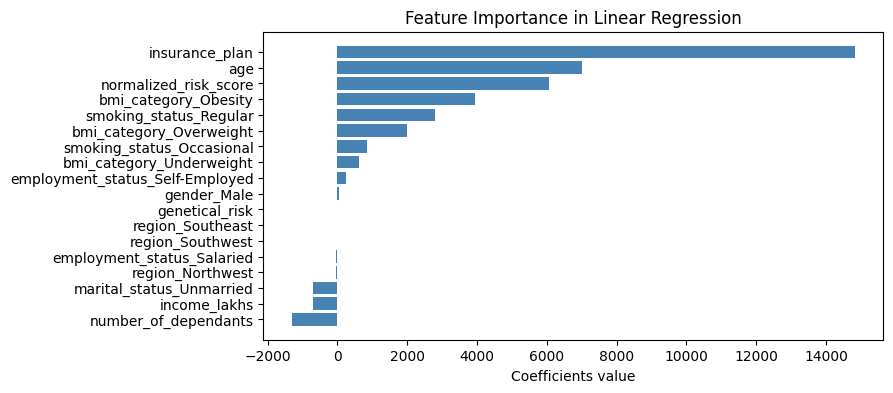

In [49]:

##ploting bar graph of maximum weightage
plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['Coefficients'],color = "steelblue")
plt.xlabel("Coefficients value")
plt.title("Feature Importance in Linear Regression")
plt.show()

In [50]:
#### RIDGE MODEL
model_rg = Ridge()
model_rg.fit(X_train,y_train)
train_score = model_rg.score(X_train,y_train)
test_score = model_rg.score(X_test,y_test)
print(train_score,test_score)

0.9534162332209687 0.9538456995663842


In [51]:
#### XGBOOT REGRESSION MODEL

from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train)
train_score = model_xgb.score(X_train,y_train)
test_score = model_xgb.score(X_test,y_test)
print(train_score,test_score)  ## 98.68 %

0.9986370801925659 0.9979538321495056


In [52]:
##### RANDOM SEARCH CV (MODEL FINING AND TUNING)
model_xgb = XGBRegressor()
param_grid = {
    'n_estimator':[20,40,50],
    'learning_rate' :[0.01,0.1,0.2],
    'max_depth':[3,4,5]
}

random_search = RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2',random_state=42)
random_search.fit(X_train,y_train)
print(random_search.best_score_)
print(random_search.best_params_)

c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:17:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:17:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:17:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:17:15] WARNING: C:\actions-runner\_wor

0.9981012145678202
{'n_estimator': 40, 'max_depth': 5, 'learning_rate': 0.1}


In [53]:
best_model = random_search.best_estimator_

feature_importance = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importance,index = X_test.columns,columns=['Coefficients'])
print(coef_df)
coef_df = coef_df.sort_values(by='Coefficients')
print(coef_df)

                                 Coefficients
age                                  0.031653
number_of_dependants                 0.000018
income_lakhs                         0.000017
insurance_plan                       0.861651
genetical_risk                       0.000000
normalized_risk_score                0.025786
gender_Male                          0.000015
region_Northwest                     0.000025
region_Southeast                     0.000014
region_Southwest                     0.000011
marital_status_Unmarried             0.000018
bmi_category_Obesity                 0.030182
bmi_category_Overweight              0.016169
bmi_category_Underweight             0.001376
smoking_status_Occasional            0.004301
smoking_status_Regular               0.028727
employment_status_Salaried           0.000018
employment_status_Self-Employed      0.000019
                                 Coefficients
genetical_risk                       0.000000
region_Southwest                  

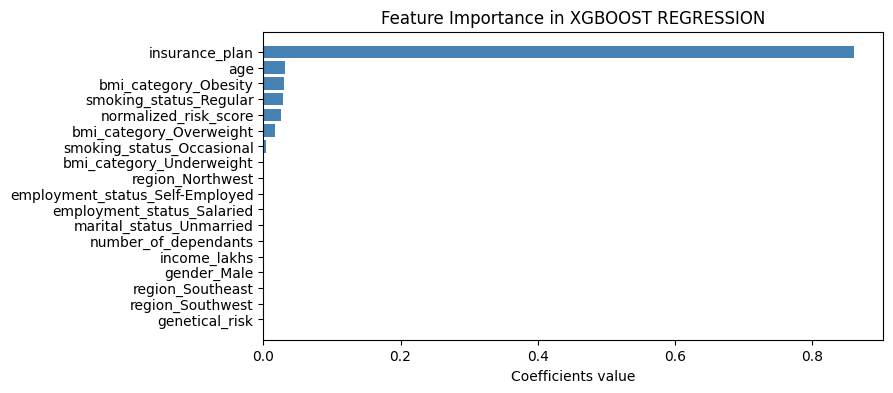

In [54]:
##ploting bar graph of maximum weightage
plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['Coefficients'],color = "steelblue")
plt.xlabel("Coefficients value")
plt.title("Feature Importance in XGBOOST REGRESSION")
plt.show()

In [55]:
#### ERROR ANALYSIS
y_pred  = best_model.predict(X_test)
residual = y_pred-y_test
residual_pct = (residual*100)/y_test

resultant_df = pd.DataFrame({
    "actual" : y_test,
    "predicted" : y_pred,
    "diff" : residual ,
    "diff_pct" : residual_pct
})

In [56]:
resultant_df.head()

,actual,predicted,diff,diff_pct
19713,26895,26575.996094,-319.003906,-1.186109
14750,22734,23002.570312,268.570312,1.181360
19932,21198,21546.892578,348.892578,1.645875
29643,9100,9120.255859,20.255859,0.222592
17076,26434,26575.101562,141.101562,0.533788


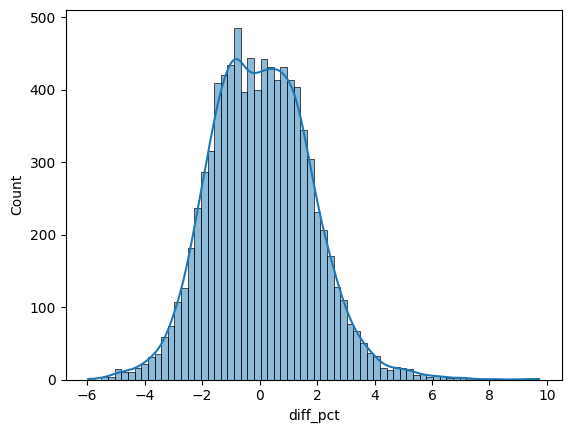

In [57]:
sns.histplot(resultant_df['diff_pct'],kde = True)
plt.show()

In [58]:
extreme_error_threshold = 10
extreme_result_df = resultant_df[np.abs(resultant_df.diff_pct) >extreme_error_threshold]
print(extreme_result_df)
print(extreme_result_df.shape)
print(resultant_df.shape)

Empty DataFrame
Columns: [actual, predicted, diff, diff_pct]
Index: []
(0, 4)
(8947, 4)


In [59]:
extreme_error_pct = extreme_result_df.shape[0]*100/resultant_df.shape[0]

print(extreme_error_pct)  ### percentage of how many resultant row have extreme error

print(resultant_df[np.abs(resultant_df.diff_pct) >50].sort_values('diff_pct',ascending=False))


0.0
Empty DataFrame
Columns: [actual, predicted, diff, diff_pct]
Index: []


In [60]:
extreme_error_df = X_test.loc[extreme_result_df.index]
print(extreme_error_df.head())

Empty DataFrame
Columns: [age, number_of_dependants, income_lakhs, insurance_plan, genetical_risk, normalized_risk_score, gender_Male, region_Northwest, region_Southeast, region_Southwest, marital_status_Unmarried, bmi_category_Obesity, bmi_category_Overweight, bmi_category_Underweight, smoking_status_Occasional, smoking_status_Regular, employment_status_Salaried, employment_status_Self-Employed]
Index: []


In [61]:
# Number of features
num_features = len(X_test.columns)
cols = 4
rows = math.ceil(num_features / cols)

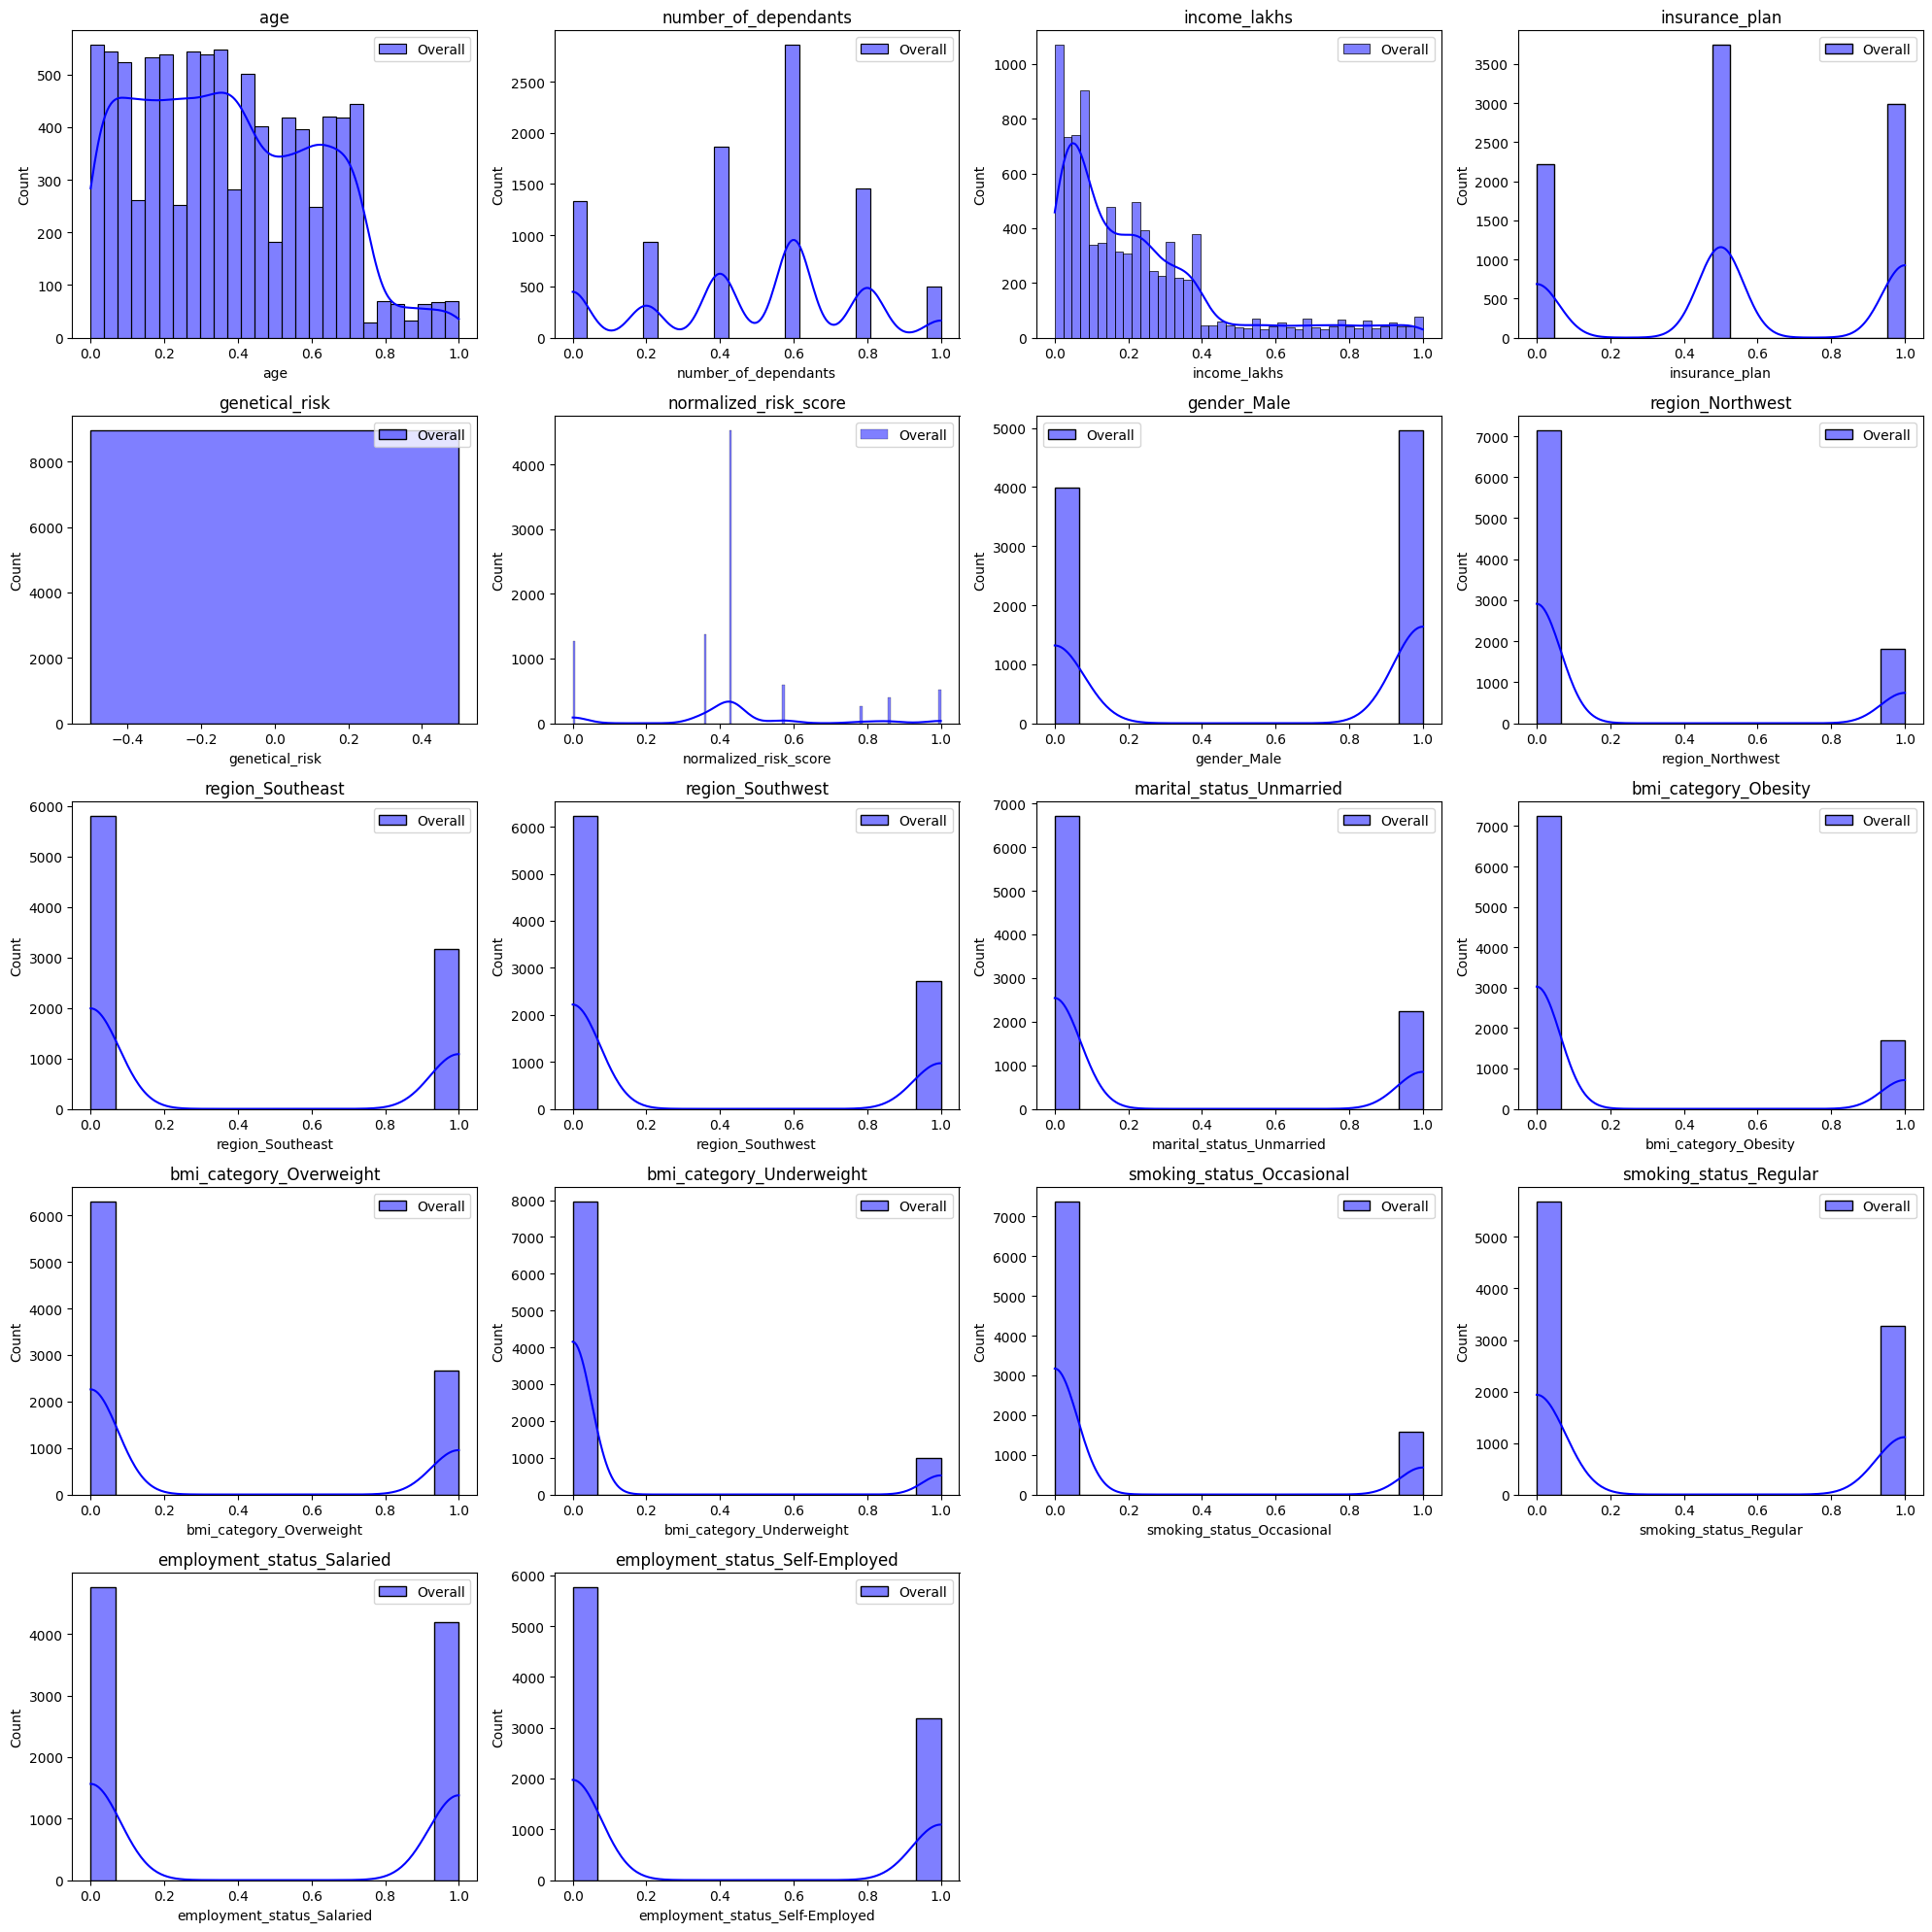

In [62]:
# Set figure size (width per plot * cols, height per plot * rows)
plt.figure(figsize=(5 * cols, 4 * rows))

for idx, feature_ in enumerate(X_test.columns):
    plt.subplot(rows, cols, idx + 1)
    sns.histplot(X_test[feature_], label="Overall", kde=True, color='blue')
    sns.histplot(extreme_error_df[feature_], label="Extreme error", kde=True, color='red')
    plt.title(feature_)
    plt.legend()

plt.tight_layout()
plt.show()

In [63]:
print(col_to_scale)
print(extreme_error_df.columns)


['age', 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan', 'genetical_risk']
Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'genetical_risk', 'normalized_risk_score', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')


In [64]:
df_reversed = pd.DataFrame()
extreme_error_df['income_level'] = -1

In [65]:
# Check if there are any rows before applying inverse_transform
if not extreme_error_df.empty:
    df_reversed[col_to_scale] = scaler.inverse_transform(extreme_error_df[col_to_scale])
    
    # Plot and statistics only if there is data
    sns.histplot(df_reversed['age'])
    plt.show()

    print(df_reversed.describe())
    print(df_reversed['age'].quantile(0.99))
else:
    print("extreme_error_df is empty. Skipping inverse_transform and visualization.")



extreme_error_df is empty. Skipping inverse_transform and visualization.


In [66]:
import os
from joblib import dump

# Create the folder if it doesn't exist
os.makedirs("../app/Artifacts", exist_ok=True)

# Now save the model and scaler
dump(best_model, "../app/Artifacts/model_rest.joblib")

scaler_with_cols = {
    'scaler': scaler,
    'col_to_scale': col_to_scale
}

dump(scaler_with_cols, "../app/Artifacts/scaler_rest.joblib")


['../app/Artifacts/scaler_rest.joblib']

In [67]:
######### EXPORT THE MODEL

from joblib import dump
dump(best_model,'model_rest.joblib')
dump(scaler,"scaler_rest.joblib")


['scaler_rest.joblib']